In [82]:
%load_ext autoreload
%autoreload 2
from tools.faiss_db import find_threhold_for_each_class, create_db_exact_NN, OUTPUT_PATH
from tools.utils import draw_bbboxes, xyxy_to_xywh, xywh_to_xyxy
import numpy as np
import os
from pycocotools.coco import COCO
coco = COCO("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/instances_val2017.json")

coco_cat_to_continous_cat = {v: i+1 for i,v in enumerate(coco.getCatIds())}
continious_cat_to_coco = {v:k for k,v in coco_cat_to_continous_cat.items()}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!


In [2]:
db = np.load(os.path.join(OUTPUT_PATH, "feature_db_val_test0.npy"))

In [3]:
features = np.array(db[:, 7:])
classes = np.array(db[:, 2])
faiss_db = create_db_exact_NN(features)
N = 13200
distance, index = faiss_db.search(features[N:N+1], k =5)
print(classes[N])
print(distance)
print(index)
print(classes[index])

1.0
[[  0.       100.255974 119.95136  123.559906 125.81476 ]]
[[13200 13199  4086  3488 14877]]
[[ 1.  1.  1.  6. 19.]]


In [68]:
N=6
idx = np.random.choice(np.where(classes==N)[0], 5)
distance, index = faiss_db.search(features[idx], k =5)
print(N, idx)
print(distance)
print(index)
print(classes[index])

6 [ 6938  1103 28804 32941  5717]
[[  0.        67.35689  102.58017  107.86099  121.60769 ]
 [  0.        47.398907  60.175697  63.08248   66.49686 ]
 [  0.       204.1127   207.22255  223.10486  230.6178  ]
 [  0.        42.16015   45.723965  47.556114  47.59371 ]
 [  0.       138.55937  140.84879  145.71323  154.76402 ]]
[[ 6938  6935  6955 18976 20902]
 [ 1103  1106  1107 21833 21838]
 [28804 32416 28620 25150 25148]
 [32941  6389 34161 30038 20855]
 [ 5717  6055 21229 30562 11122]]
[[ 6.  6.  1.  1. 39.]
 [ 6.  6.  6.  1. 31.]
 [ 6.  1.  1.  3.  3.]
 [ 6.  5.  1.  1.  1.]
 [ 6.  6.  6.  6.  8.]]


In [99]:
image_idx

327701

In [98]:
[(ann["category_id"], ann['bbox']) for ann in coco.imgToAnns[image_idx]]

[(37, [381.04, 156.77, 18.44, 20.13]),
 (1, [329.16, 266.89, 154.5, 152.59]),
 (1, [152.2, 331.02, 63.45, 96.98]),
 (1, [557.76, 275.7, 15.49, 17.5]),
 (1, [115.42, 390.33, 40.39, 32.7]),
 (43, [385.01, 209.88, 79.03, 61.79]),
 (47, [142.74, 409.86, 10.63, 13.46]),
 (43, [553.27, 270.58, 5.77, 12.62])]

In [114]:
[(x,y )for x,y in zip(db[20897: 20905, 2], db[20897: 20905, 3:7])]

[(33.0, array([240.51999, 156.77   , 257.96   , 175.9    ], dtype=float32)),
 (1.0, array([156.34, 266.89, 309.84, 418.48], dtype=float32)),
 (1.0, array([424.35, 331.02, 486.8 , 427.  ], dtype=float32)),
 (1.0, array([ 66.75   , 275.7    ,  81.23999, 292.2    ], dtype=float32)),
 (1.0, array([484.19, 390.33, 523.58, 422.03], dtype=float32)),
 (39.0, array([175.95999, 209.88   , 253.98999, 270.67   ], dtype=float32)),
 (42.0, array([486.63, 409.86, 496.26, 422.32], dtype=float32)),
 (39.0, array([ 80.96002, 270.58   ,  85.72998, 282.2    ], dtype=float32))]

327701 43 tennis racket [175.95999, 209.88, 253.98999, 270.67]
(175.95999, 209.88, 79.02999877929688, 61.790008544921875)


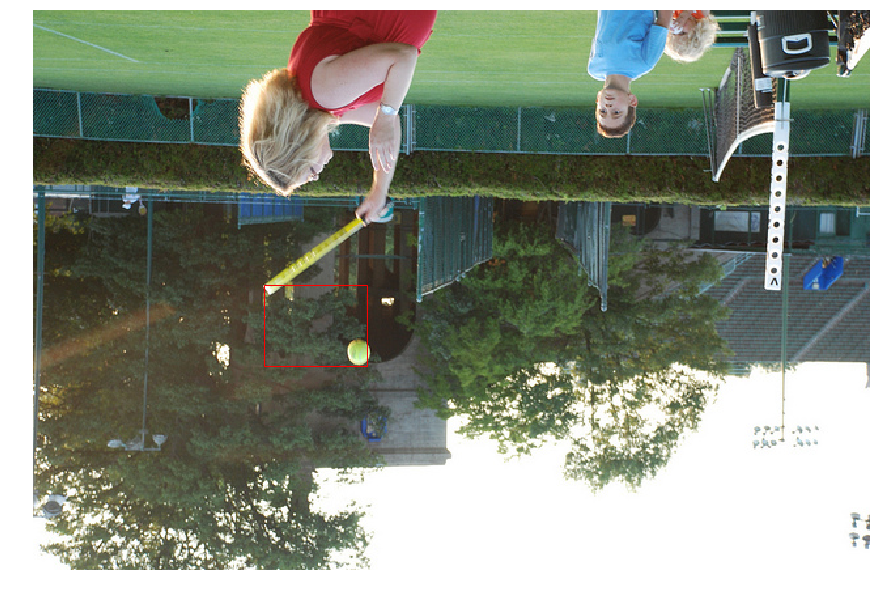

In [121]:
idx1= 20902#33388

image_idx = int(db[idx1, 0])
print(image_idx, continious_cat_to_coco[db[idx1,2]], coco.cats[continious_cat_to_coco[db[idx1,2]]]["name"], list(db[idx1, 3:7]))
bboxes = xyxy_to_xywh(list(db[idx1, 3:7]))
print(bboxes)
#bboxes = list(db[idx1, 3:7])
draw_bbboxes(image_idx, [bboxes], path="data/coco/val2017/")

[(37, [381.04, 156.77, 18.44, 20.13]),
 (1, [329.16, 266.89, 154.5, 152.59]),
 (1, [152.2, 331.02, 63.45, 96.98]),
 (1, [557.76, 275.7, 15.49, 17.5]),
 (1, [115.42, 390.33, 40.39, 32.7]),
 (43, [385.01, 209.88, 79.03, 61.79]),
 (47, [142.74, 409.86, 10.63, 13.46]),
 (43, [553.27, 270.58, 5.77, 12.62])]

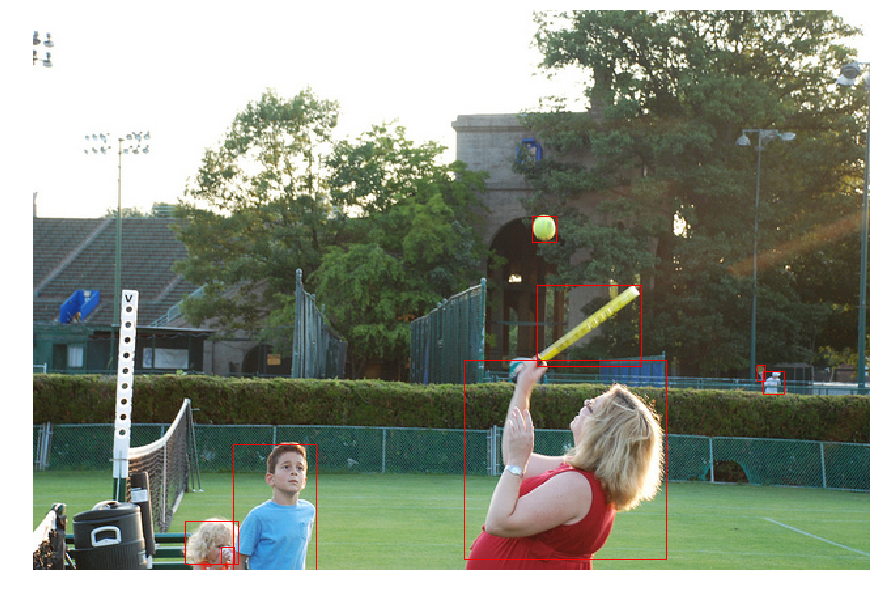

In [100]:
bboxes = [ann['bbox'] for ann in coco.imgToAnns[image_idx]]
draw_bbboxes(image_idx, bboxes, path="data/coco/val2017/")

In [101]:
bboxes

[[381.04, 156.77, 18.44, 20.13],
 [329.16, 266.89, 154.5, 152.59],
 [152.2, 331.02, 63.45, 96.98],
 [557.76, 275.7, 15.49, 17.5],
 [115.42, 390.33, 40.39, 32.7],
 [385.01, 209.88, 79.03, 61.79],
 [142.74, 409.86, 10.63, 13.46],
 [553.27, 270.58, 5.77, 12.62]]

In [62]:
xyxy  = [310.4, 82.44, 188.53, 94.62]
xyxy_to_xywh(xyxy)

(310.4, 82.44, -120.86999999999998, 13.180000000000007)

In [85]:
[385.01, 209.88, 385.01+79.03,  209.88+61.79]

[385.01, 209.88, 464.03999999999996, 271.67]

In [103]:
import json
with open("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/instances_val2017.json", 'r') as f:
    val_json = json.load(f)
    
debug_json = {}
image_id = 327701
debug_json["images"] = [img for img in val_json["images"] if img['id']== image_id]
debug_json["annotation"] = [ann for ann in val_json["annotations"] if ann['image_id']== image_id]
debug_json["categories"]  = val_json["categories"]
with open("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/debug_instances_val2017.json", 'w') as f:
    json.dump(debug_json,f)